NB created 9/13/23
# Background

This notebook follows from the [Geostrophic Current Velo 1959 Means](https://vortex.geos.tamu.edu/user/kuyeda/notebooks/Geostrophic_Current_Velo_1959_Means.ipynb) notebook. The Geostrophic Current Velo 1959 Means notebook calculates geostrophic velocity from geostrophic shear and geostrophic velocity at surface. From there, we recreated Tuchen et al graphs that show the meridional geostrophic velocity at 11$^{\circ}$S and 10$^{\circ}$N at depths between 0 and 1000m in the tropics area. 

>- We also created plots of velocity at depth for latitudes at -5, 0, 2.5, and 5 degrees N in the Atlantic Basin. 
>>-  Based on these plots, we see that the velocities between 500 and 1000m appear to decrease as water moves north, and the range of longitudes over which the increased velocity at the surface occurs increases.

>- We want to know if the water that shows an increase in velocity is coming from somewhere differernt / not already in AMOC. So, we can make plots of temperature and salinity because those properties act as proxies for different types of water. 

# Set up notebook
>- packages, datasets, grid

In [1]:
import xarray as xr
import xgcm
from xgcm import Grid
import numpy as np
import warnings
from matplotlib import pyplot as plt
import matplotlib.ticker as tick
%matplotlib inline
plt.rcParams['figure.figsize']=(8,5)

In [2]:
ds1=xr.open_dataset('/vortex1/OM4_output/new_run/19590101.ocean_month_z.nc',decode_times=False)
ds1

<xarray.Dataset>
Dimensions:     (xh: 1440, yh: 1080, z_l: 35, z_i: 36, time: 12, nv: 2,
                 xq: 1441, yq: 1081)
Coordinates:
  * xh          (xh) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * yh          (yh) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * z_l         (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * z_i         (z_i) float64 0.0 5.0 15.0 25.0 ... 5.75e+03 6.25e+03 6.75e+03
  * time        (time) float64 380.5 410.0 439.5 470.0 ... 653.5 684.0 714.5
  * nv          (nv) float64 1.0 2.0
  * xq          (xq) float64 -299.8 -299.6 -299.3 -299.1 ... 59.66 59.91 60.16
  * yq          (yq) float64 -80.43 -80.35 -80.27 -80.19 ... 89.78 89.89 90.0
Data variables: (12/13)
    volcello    (time, z_l, yh, xh) float32 ...
    thetao      (time, z_l, yh, xh) float32 ...
    so          (time, z_l, yh, xh) float32 ...
    obvfsq      (time, z_i, yh, xh) float32 ...
    uo          (time, z_l, yh, xq) float32 ...
    vo          (time, z_l, yq, xh) float32 ...
    ...          ...
    vmo         (time, z_l, yq, xh) float32 ...
    vhml        (time, z_l, yq, xh) float32 ...
    average_T1  (time) float64 ...
    average_T2  (time) float64 ...
    average_DT  (time) float64 ...
    time_bnds   (time, nv) float64 ...
Attributes:
    filename:          19590101.ocean_month_z.nc
    title:             OM4_025
    associated_files:  areacello: 19590101.ocean_static.nc
    grid_type:         regular
    grid_tile:         N/A

In [3]:
grid= Grid(ds1, coords={'X':{'center':'xh','outer':'xq'},'Y':{'center':'yh','outer':'yq'}, 'Z':{'center':'z_l','outer':'z_i'}},periodic=['X'])

## Let's first replot the meridional velocities in the tropics region so that we can compare them later

In [4]:
vo_mean=ds1.vo.mean(dim='time')

In [5]:
'''
# Meridional Velocity at 5S, 0, 5N
fig,ax=plt.subplots(nrows=4,ncols=1,constrained_layout=True,figsize=(10,15))

v_5S=vo_mean.sel(yq=-5,method="nearest")#.where((velo_from_shear.x > 3) | (velo_from_shear.yh < -3))
v_5S.plot(ax=ax[0],x='xh',y='z_l',cmap='RdBu_r',vmin=-0.3,vmax=0.3)

v_0=vo_mean.sel(yq=0,method="nearest")
v_0.plot(ax=ax[1],x='xh',y='z_l',cmap='RdBu_r',vmin=-0.3,vmax=0.3)

v_25=vo_mean.sel(yq=2.5,method="nearest")
v_25.plot(ax=ax[2],x='xh',y='z_l',cmap='RdBu_r',vmin=-0.3,vmax=0.3)

v_5N=vo_mean.sel(yq=5,method="nearest")
v_5N.plot(ax=ax[3],x='xh',y='z_l',cmap='RdBu_r',vmin=-0.3,vmax=0.3)

for i in range(0,4):
    lat=str(int((5*i)-5))
    ax[i].set_facecolor('grey')
    ax[i].set_xlim(-55,-10)
    ax[i].set_ylabel('Depth (m)',fontsize=12)
    ax[i].set_ylim(0,1500)
    ax[i].set_yticks(np.arange(0,1500,500))
    ax[i].set_xlabel('Longitude',fontsize=12)
    ax[i].set_xticks(np.arange(-55,-10,5))
    ax[i].grid(alpha=0.5)
    ax[i].invert_yaxis()

ax[0].set_title('5 $^{\circ}$S (MOM-6)',weight='bold',fontsize=15)    
ax[1].set_title('$0^{\circ}$N(MOM-6)',weight='bold',fontsize=15)
ax[2].set_title('2.5$^{\circ}$N (MOM-6)',weight='bold',fontsize=15)
ax[3].set_title('5$^{\circ}$N (MOM-6)',weight='bold',fontsize=15)
fig.suptitle('Meridional Velocity in Tropics Region',fontsize=20)
'''

'\n# Meridional Velocity at 5S, 0, 5N\nfig,ax=plt.subplots(nrows=4,ncols=1,constrained_layout=True,figsize=(10,15))\n\nv_5S=vo_mean.sel(yq=-5,method="nearest")#.where((velo_from_shear.x > 3) | (velo_from_shear.yh < -3))\nv_5S.plot(ax=ax[0],x=\'xh\',y=\'z_l\',cmap=\'RdBu_r\',vmin=-0.3,vmax=0.3)\n\nv_0=vo_mean.sel(yq=0,method="nearest")\nv_0.plot(ax=ax[1],x=\'xh\',y=\'z_l\',cmap=\'RdBu_r\',vmin=-0.3,vmax=0.3)\n\nv_25=vo_mean.sel(yq=2.5,method="nearest")\nv_25.plot(ax=ax[2],x=\'xh\',y=\'z_l\',cmap=\'RdBu_r\',vmin=-0.3,vmax=0.3)\n\nv_5N=vo_mean.sel(yq=5,method="nearest")\nv_5N.plot(ax=ax[3],x=\'xh\',y=\'z_l\',cmap=\'RdBu_r\',vmin=-0.3,vmax=0.3)\n\nfor i in range(0,4):\n    lat=str(int((5*i)-5))\n    ax[i].set_facecolor(\'grey\')\n    ax[i].set_xlim(-55,-10)\n    ax[i].set_ylabel(\'Depth (m)\',fontsize=12)\n    ax[i].set_ylim(0,1500)\n    ax[i].set_yticks(np.arange(0,1500,500))\n    ax[i].set_xlabel(\'Longitude\',fontsize=12)\n    ax[i].set_xticks(np.arange(-55,-10,5))\n    ax[i].grid(alpha

# Temperature Plots

In [6]:
import cmocean.cm as cmo

In [7]:
thetao_mean=ds1.thetao.mean(dim='time')

Text(0.5, 0.98, 'Potential Temperature in Tropics Region')

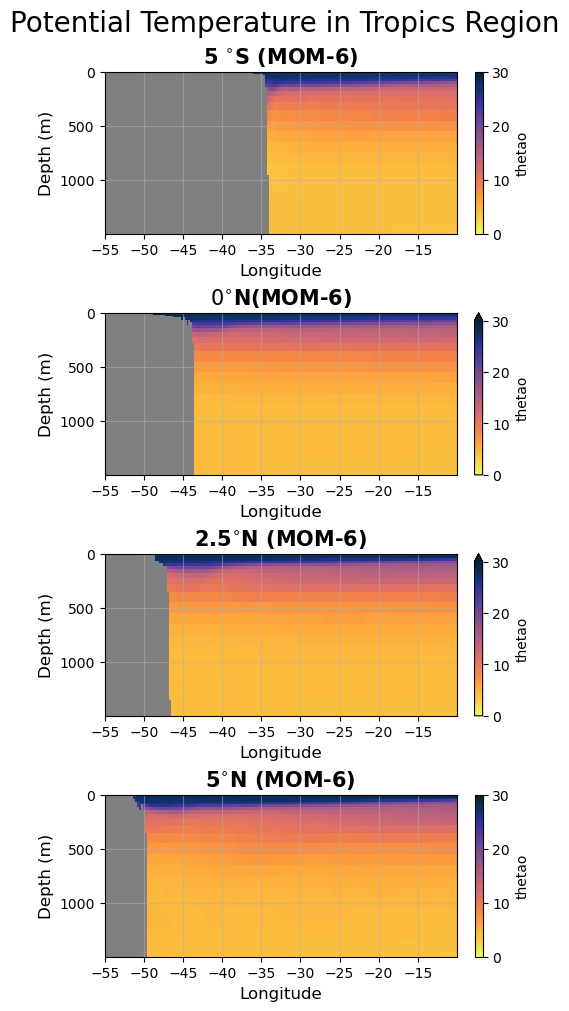

In [8]:
# Potential Temperature at 5S, 0, 2.5N, 5N
fig,ax=plt.subplots(nrows=4,ncols=1,constrained_layout=True,figsize=(5,10))

thetao_5S=thetao_mean.sel(yh=-5,method="nearest")
thetao_5S.plot(ax=ax[0],x='xh',y='z_l',cmap=cmo.thermal_r,vmin=0,vmax=30)

thetao_0=thetao_mean.sel(yh=0,method="nearest")
thetao_0.plot(ax=ax[1],x='xh',y='z_l',cmap=cmo.thermal_r,vmin=0,vmax=30)

thetao_25=thetao_mean.sel(yh=2.5,method="nearest")
thetao_25.plot(ax=ax[2],x='xh',y='z_l',cmap=cmo.thermal_r,vmin=0,vmax=30)

thetao_5N=thetao_mean.sel(yh=5,method="nearest")
thetao_5N.plot(ax=ax[3],x='xh',y='z_l',cmap=cmo.thermal_r,vmin=0,vmax=30)

for i in range(0,4):
    lat=str(int((5*i)-5))
    ax[i].set_facecolor('grey')
    ax[i].set_xlim(-55,-10)
    ax[i].set_ylabel('Depth (m)',fontsize=12)
    ax[i].set_ylim(0,1500)
    ax[i].set_yticks(np.arange(0,1500,500))
    ax[i].set_xlabel('Longitude',fontsize=12)
    ax[i].set_xticks(np.arange(-55,-10,5))
    ax[i].grid(alpha=0.5)
    ax[i].invert_yaxis()

ax[0].set_title('5 $^{\circ}$S (MOM-6)',weight='bold',fontsize=15)    
ax[1].set_title('$0^{\circ}$N(MOM-6)',weight='bold',fontsize=15)
ax[2].set_title('2.5$^{\circ}$N (MOM-6)',weight='bold',fontsize=15)
ax[3].set_title('5$^{\circ}$N (MOM-6)',weight='bold',fontsize=15)
fig.suptitle('Potential Temperature in Tropics Region',fontsize=20)

# Salinity Plots

In [9]:
so_mean=ds1.so.mean(dim='time')

Text(0.5, 0.98, 'Seawater Salinity in Tropics Region')

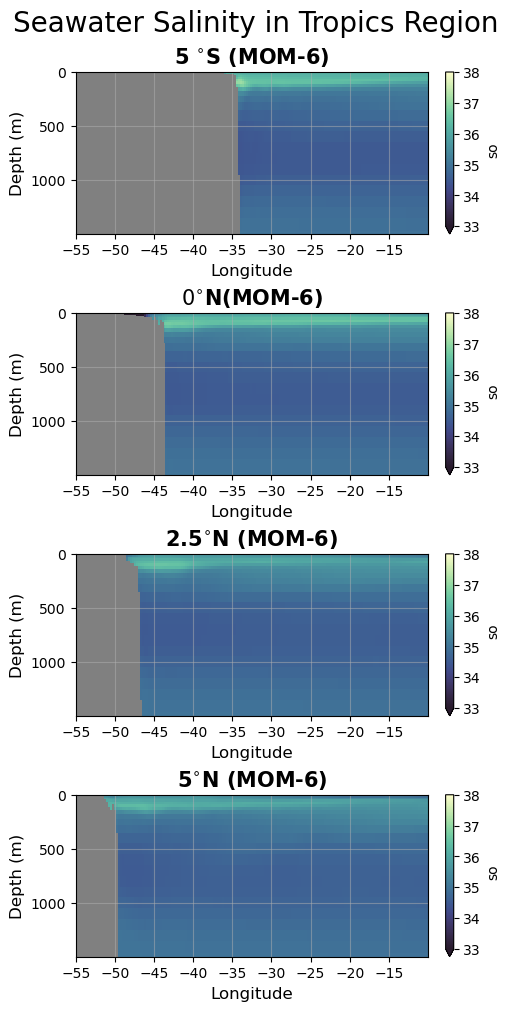

In [10]:
# Potential Temperature at 5S, 0, 2.5N, 5N
fig,ax=plt.subplots(nrows=4,ncols=1,constrained_layout=True,figsize=(5,10))

so_5S=so_mean.sel(yh=-5,method="nearest")#.where((velo_from_shear.x > 3) | (velo_from_shear.yh < -3))
so_5S.plot(ax=ax[0],x='xh',y='z_l',cmap=cmo.deep_r,vmin=33,vmax=38)

so_0=so_mean.sel(yh=0,method="nearest")
so_0.plot(ax=ax[1],x='xh',y='z_l',cmap=cmo.deep_r,vmin=33,vmax=38)

so_25=so_mean.sel(yh=2.5,method="nearest")
so_25.plot(ax=ax[2],x='xh',y='z_l',cmap=cmo.deep_r,vmin=33,vmax=38)

so_5N=so_mean.sel(yh=5,method="nearest")
so_5N.plot(ax=ax[3],x='xh',y='z_l',cmap=cmo.deep_r,vmin=33,vmax=38)

for i in range(0,4):
    lat=str(int((5*i)-5))
    ax[i].set_facecolor('grey')
    ax[i].set_xlim(-55,-10)
    ax[i].set_ylabel('Depth (m)',fontsize=12)
    ax[i].set_ylim(0,1500)
    ax[i].set_yticks(np.arange(0,1500,500))
    ax[i].set_xlabel('Longitude',fontsize=12)
    ax[i].set_xticks(np.arange(-55,-10,5))
    ax[i].grid(alpha=0.5)
    ax[i].invert_yaxis()

ax[0].set_title('5 $^{\circ}$S (MOM-6)',weight='bold',fontsize=15)    
ax[1].set_title('$0^{\circ}$N(MOM-6)',weight='bold',fontsize=15)
ax[2].set_title('2.5$^{\circ}$N (MOM-6)',weight='bold',fontsize=15)
ax[3].set_title('5$^{\circ}$N (MOM-6)',weight='bold',fontsize=15)
fig.suptitle('Seawater Salinity in Tropics Region',fontsize=20)

# All 3 properties on one plot
- this could probably be condensed to some sort of for loop but I just copied and pasted it for now

Text(-38, -450, 'Velocity')

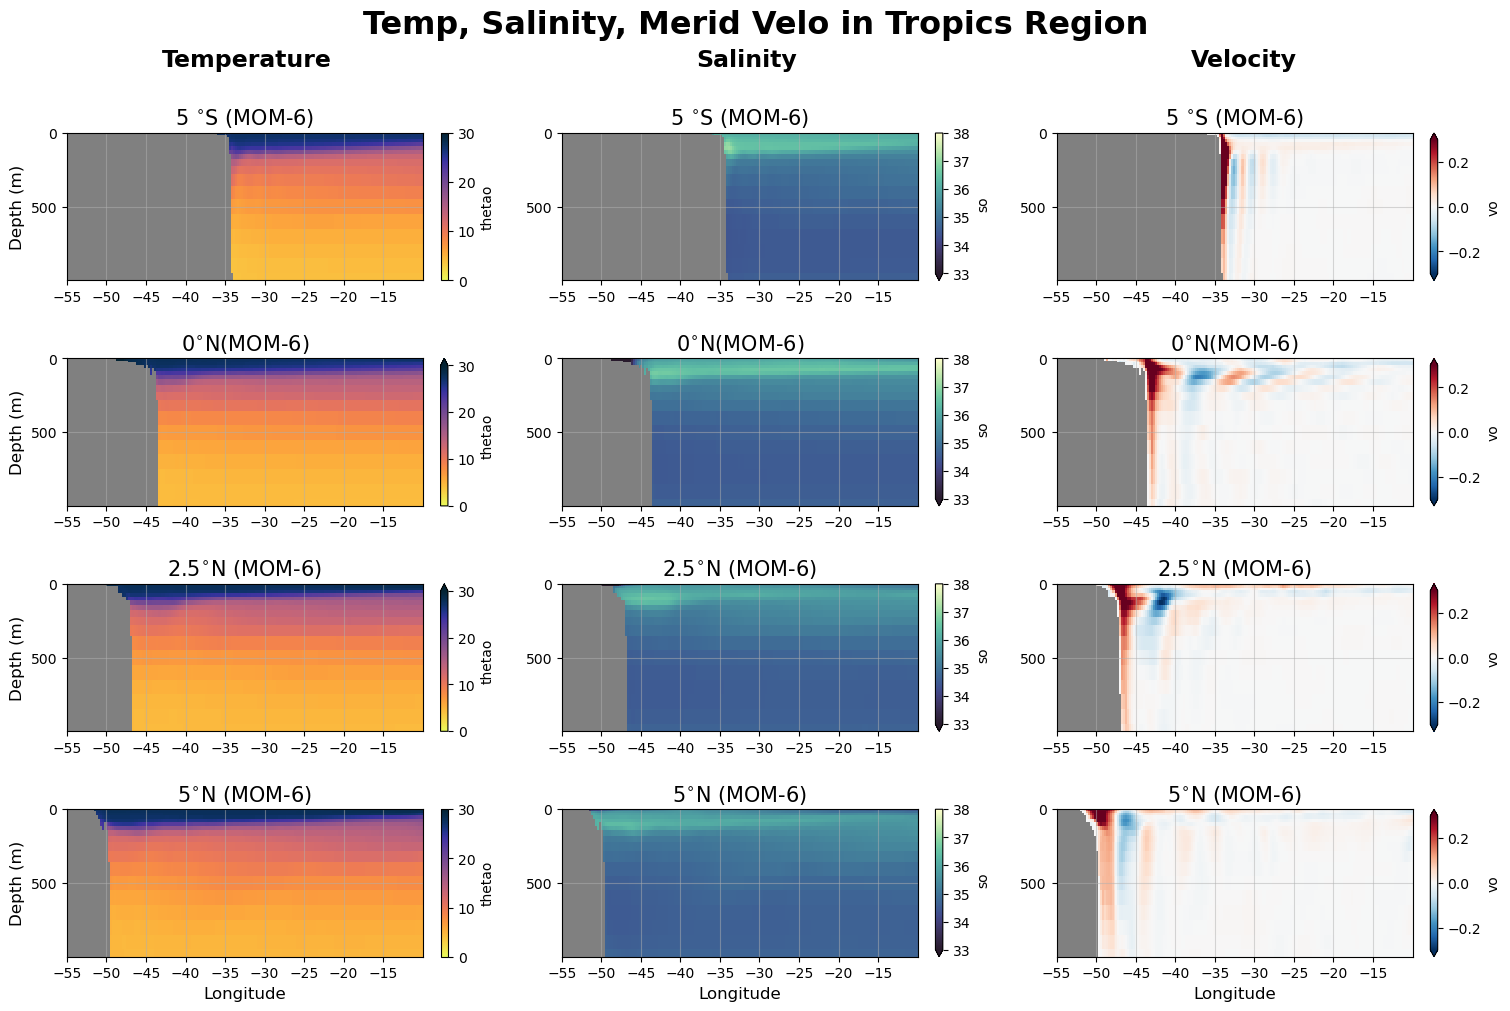

In [11]:
# All properties at 5S, 0, 2.5N, 5N
fig,ax=plt.subplots(nrows=4,ncols=3,constrained_layout=True,figsize=(15,10))

# Temperature
thetao_5S=thetao_mean.sel(yh=-5,method="nearest")
thetao_5S.plot(ax=ax[0,0],x='xh',y='z_l',cmap=cmo.thermal_r,vmin=0,vmax=30)

thetao_0=thetao_mean.sel(yh=0,method="nearest")
thetao_0.plot(ax=ax[1,0],x='xh',y='z_l',cmap=cmo.thermal_r,vmin=0,vmax=30)

thetao_25=thetao_mean.sel(yh=2.5,method="nearest")
thetao_25.plot(ax=ax[2,0],x='xh',y='z_l',cmap=cmo.thermal_r,vmin=0,vmax=30)

thetao_5N=thetao_mean.sel(yh=5,method="nearest")
thetao_5N.plot(ax=ax[3,0],x='xh',y='z_l',cmap=cmo.thermal_r,vmin=0,vmax=30)

# Salinity
so_5S=so_mean.sel(yh=-5,method="nearest")#.where((velo_from_shear.x > 3) | (velo_from_shear.yh < -3))
so_5S.plot(ax=ax[0,1],x='xh',y='z_l',cmap=cmo.deep_r,vmin=33,vmax=38)

so_0=so_mean.sel(yh=0,method="nearest")
so_0.plot(ax=ax[1,1],x='xh',y='z_l',cmap=cmo.deep_r,vmin=33,vmax=38)

so_25=so_mean.sel(yh=2.5,method="nearest")
so_25.plot(ax=ax[2,1],x='xh',y='z_l',cmap=cmo.deep_r,vmin=33,vmax=38)

so_5N=so_mean.sel(yh=5,method="nearest")
so_5N.plot(ax=ax[3,1],x='xh',y='z_l',cmap=cmo.deep_r,vmin=33,vmax=38)

# Velocity
v_5S=vo_mean.sel(yq=-5,method="nearest")
v_5S.plot(ax=ax[0,2],x='xh',y='z_l',cmap='RdBu_r',vmin=-0.3,vmax=0.3)

v_0=vo_mean.sel(yq=0,method="nearest")
v_0.plot(ax=ax[1,2],x='xh',y='z_l',cmap='RdBu_r',vmin=-0.3,vmax=0.3)

v_25=vo_mean.sel(yq=2.5,method="nearest")
v_25.plot(ax=ax[2,2],x='xh',y='z_l',cmap='RdBu_r',vmin=-0.3,vmax=0.3)

v_5N=vo_mean.sel(yq=5,method="nearest")
v_5N.plot(ax=ax[3,2],x='xh',y='z_l',cmap='RdBu_r',vmin=-0.3,vmax=0.3)

# Plot formatting 

for i in range(0,4):
    for j in range(0,3):
        lat=str(int((5*i)-5))
        ax[i,j].set_facecolor('grey')
        ax[i,j].set_xlim(-55,-10)
        ax[i,j].set_ylim(0,1000)
        ax[i,j].set_xlabel(' ')
        ax[i,j].grid(alpha=0.5)
        ax[i,j].invert_yaxis()
        ax[i,j].set_ylabel(' ')
        ax[i,j].set_yticks(np.arange(0,1000,500))
        ax[i,j].set_xticks(np.arange(-55,-10,5))
        ax[i,j].set

for i in range(0,4):
    ax[i,0].set_ylabel('Depth (m)',fontsize=12)
    
for j in range(0,3):
    ax[3,j].set_xlabel('Longitude',fontsize=12)
    
for j in range(0,3):
    ax[0,j].set_title('5 $^{\circ}$S (MOM-6)',fontsize=15)    
    ax[1,j].set_title('$0^{\circ}$N(MOM-6)',fontsize=15)
    ax[2,j].set_title('2.5$^{\circ}$N (MOM-6)',fontsize=15)
    ax[3,j].set_title('5$^{\circ}$N (MOM-6)',fontsize=15)


fig.suptitle('Temp, Salinity, Merid Velo in Tropics Region',fontsize=23,weight='bold')
ax[0,0].annotate('Temperature',xy=(-43,-450),annotation_clip=False,fontsize=17,weight='bold')
ax[0,1].annotate('Salinity',xy=(-38,-450),annotation_clip=False,fontsize=17,weight='bold')
ax[0,2].annotate('Velocity',xy=(-38,-450),annotation_clip=False,fontsize=17,weight='bold')

#ax[0,0].set_title('Temperature\n 5 $^{\circ}$S (MOM-6)',fontsize=20)
#ax[0,1].suptitle('Salinity')
#ax[0,2].suptitle('Velocity')

Text(0.5, 0, 'Longitude')

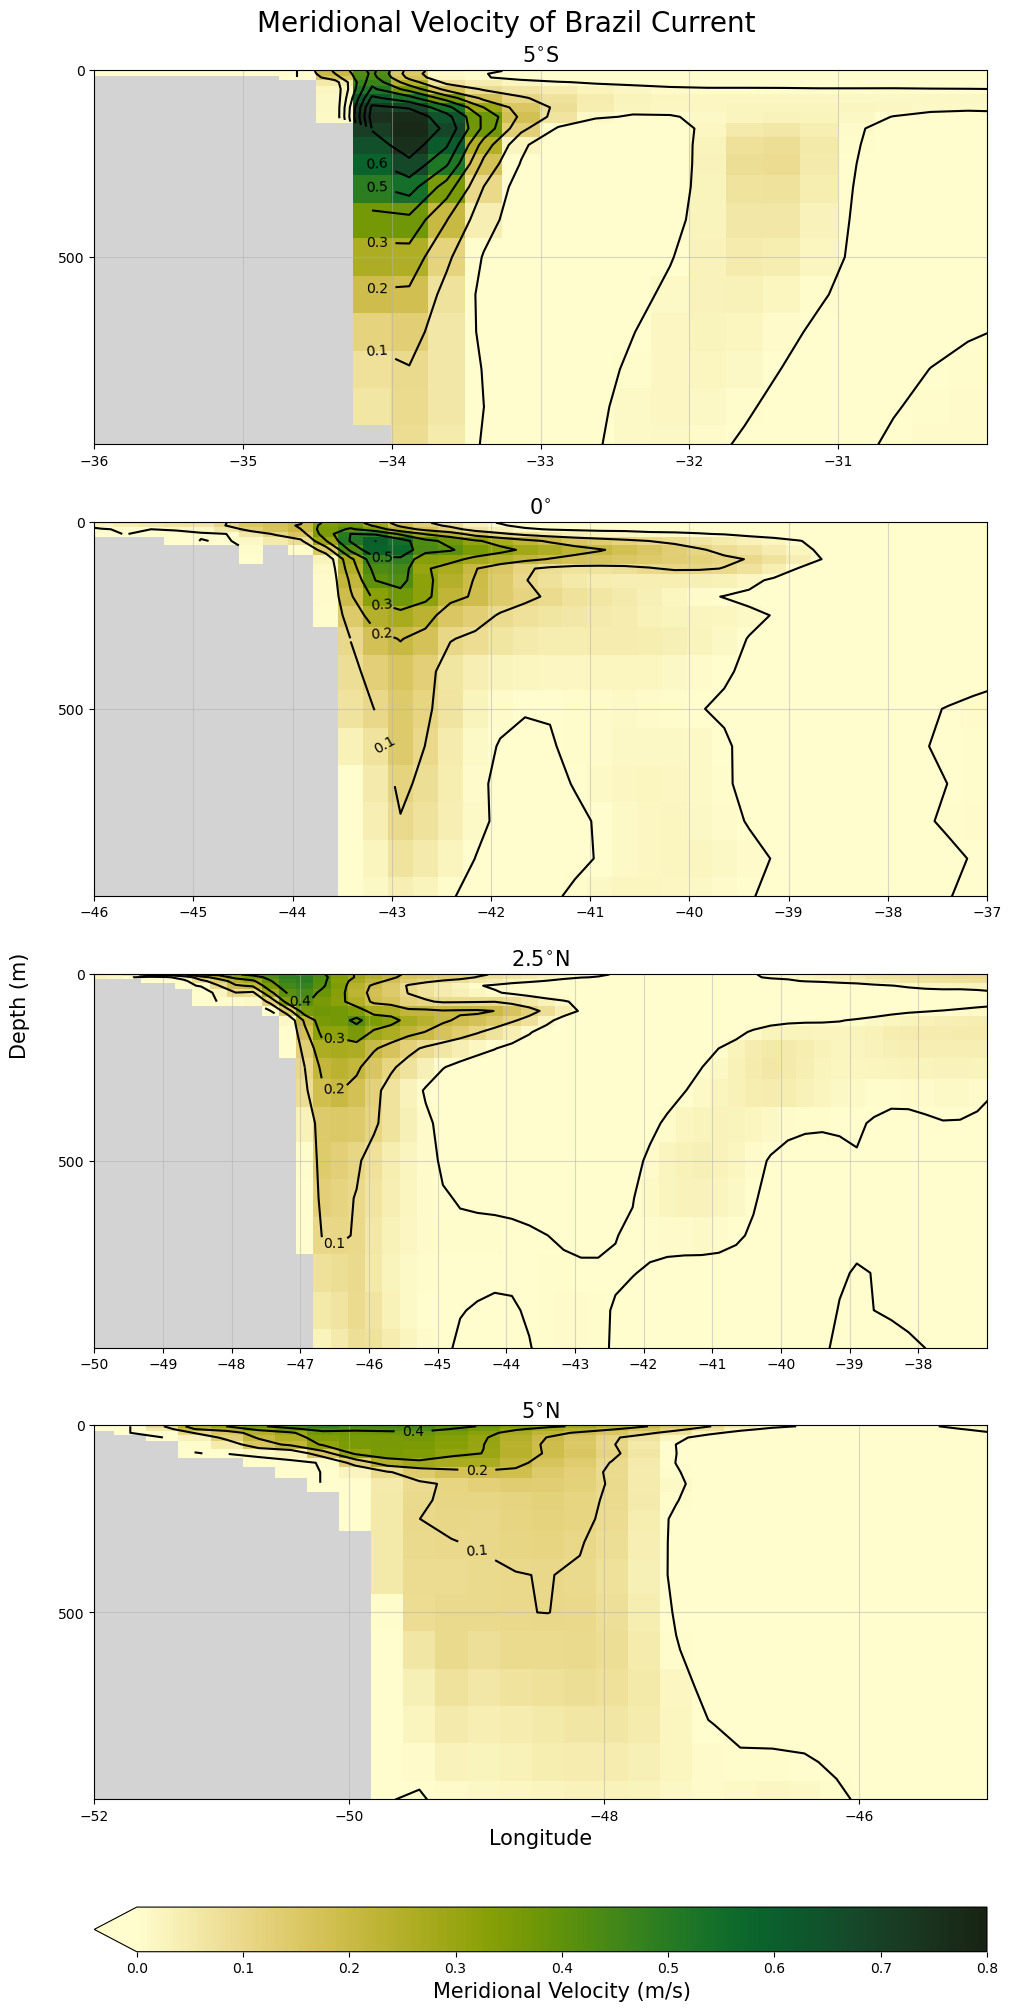

In [12]:
fig,ax=plt.subplots(nrows=4,ncols=1,constrained_layout=True,figsize=(10,20))

fig.suptitle('Meridional Velocity of Brazil Current',fontsize=20)
fig.supylabel('Depth (m)',fontsize=15)

# pcolormesh
v_5S=vo_mean.sel(yq=-5,method="nearest")
for_cbar=v_5S.plot(ax=ax[0],x='xh',y='z_l',cmap='cmo.speed',vmin=0,vmax=0.8,add_colorbar=False)
ax[0].set_xlim(-36,-30)
ax[i].set_xticks(np.arange(-56,-30,2))

v_0=vo_mean.sel(yq=0,method="nearest")
v_0.plot(ax=ax[1],x='xh',y='z_l',cmap='cmo.speed',vmin=0,vmax=0.8,add_colorbar=False)
ax[1].set_xlim(-46,-37)

v_25=vo_mean.sel(yq=2.5,method="nearest")
v_25.plot(ax=ax[2],x='xh',y='z_l',cmap='cmo.speed',vmin=0,vmax=0.8,add_colorbar=False)
ax[2].set_xlim(-50,-37)

v_5N=vo_mean.sel(yq=5,method="nearest")
v_5N.plot(ax=ax[3],x='xh',y='z_l',cmap='cmo.speed',vmin=0,vmax=0.8,add_colorbar=False)
ax[3].set_xlim(-52,-45)

# Contour
cplevels=np.arange(0,0.8,0.1)
label_levels=np.arange(0,0.8,0.2)

v_5S=vo_mean.sel(yq=-5,method="nearest")
v_5S_plot=v_5S.plot.contour(ax=ax[0],x='xh',y='z_l',levels=cplevels,colors='k',vmin=0,vmax=0.8)
ax[0].set_xlim(-36,-30)
ax[0].set_xticks(np.arange(-36,-30,1))
manloc0=[(-34.1,550),(-34.1,700),(-34.1,250),(-34.1,300),(-34.1,510)]
ax[0].clabel(v_5S_plot,levels=cplevels,inline=True,manual=manloc0,colors='k')
ax[0].set_title('5$^{\circ}$S',fontsize=15)

v_0=vo_mean.sel(yq=0,method="nearest")
v_0_plot=v_0.plot.contour(ax=ax[1],x='xh',y='z_l',levels=cplevels,colors='k',vmin=0,vmax=0.8)
ax[1].set_xlim(-46,-37)
manloc1=[(-43.1,700),(-43.1,300),(-43.1,250),(-43.1,70)]
ax[1].clabel(v_0_plot,levels=cplevels,inline_spacing=-1,manual=manloc1,colors='k')
ax[1].set_title('0$^{\circ}$',fontsize=15)

v_25=vo_mean.sel(yq=2.5,method="nearest")
v_25_plot=v_25.plot.contour(ax=ax[2],x='xh',y='z_l',levels=cplevels,colors='k',vmin=0,vmax=0.8)
ax[2].set_xlim(-50,-37)
ax[2].set_xticks(np.arange(-50,-37,1))
manloc2=[(-47,20),(-46.5,700),(-46.5,250),(-46.5,100)]
ax[2].clabel(v_25_plot,levels=cplevels,inline_spacing=0,manual=manloc2,colors='k')
ax[2].set_title('2.5$^{\circ}$N',fontsize=15)

v_5N=vo_mean.sel(yq=5,method="nearest")
v_5N_plot=v_5N.plot.contour(ax=ax[3],x='xh',y='z_l',levels=cplevels,colors='k',vmin=0,vmax=0.8)
ax[3].set_xlim(-52,-45)
manloc3=[(-49,300),(-49.5,10),(-49,100)]
ax[3].clabel(v_5N_plot,levels=cplevels,inline=True,manual=manloc3,colors='k')
ax[3].set_title('5$^{\circ}$N',fontsize=15)

for i in range(0,4):
    lat=str(int((5*i)-5))
    ax[i].set_facecolor('lightgray')
    ax[i].set_ylim(0,1000)
    ax[i].set_xlabel(' ')
    ax[i].grid(alpha=0.5)
    ax[i].invert_yaxis()
    ax[i].set_ylabel(' ')
    ax[i].set_yticks(np.arange(0,1000,500))
    #ax[i].set_xticks(np.arange(-55,-30,5))
    
cbar=fig.colorbar(for_cbar, ax = ax[3], orientation = 'horizontal',extend='min',location='bottom',pad=0.15)
cbar.set_label('Meridional Velocity (m/s)',fontsize=15)
ax[3].set_xlabel('Longitude',fontsize=15)


Text(0.5, 0, 'Longitude')

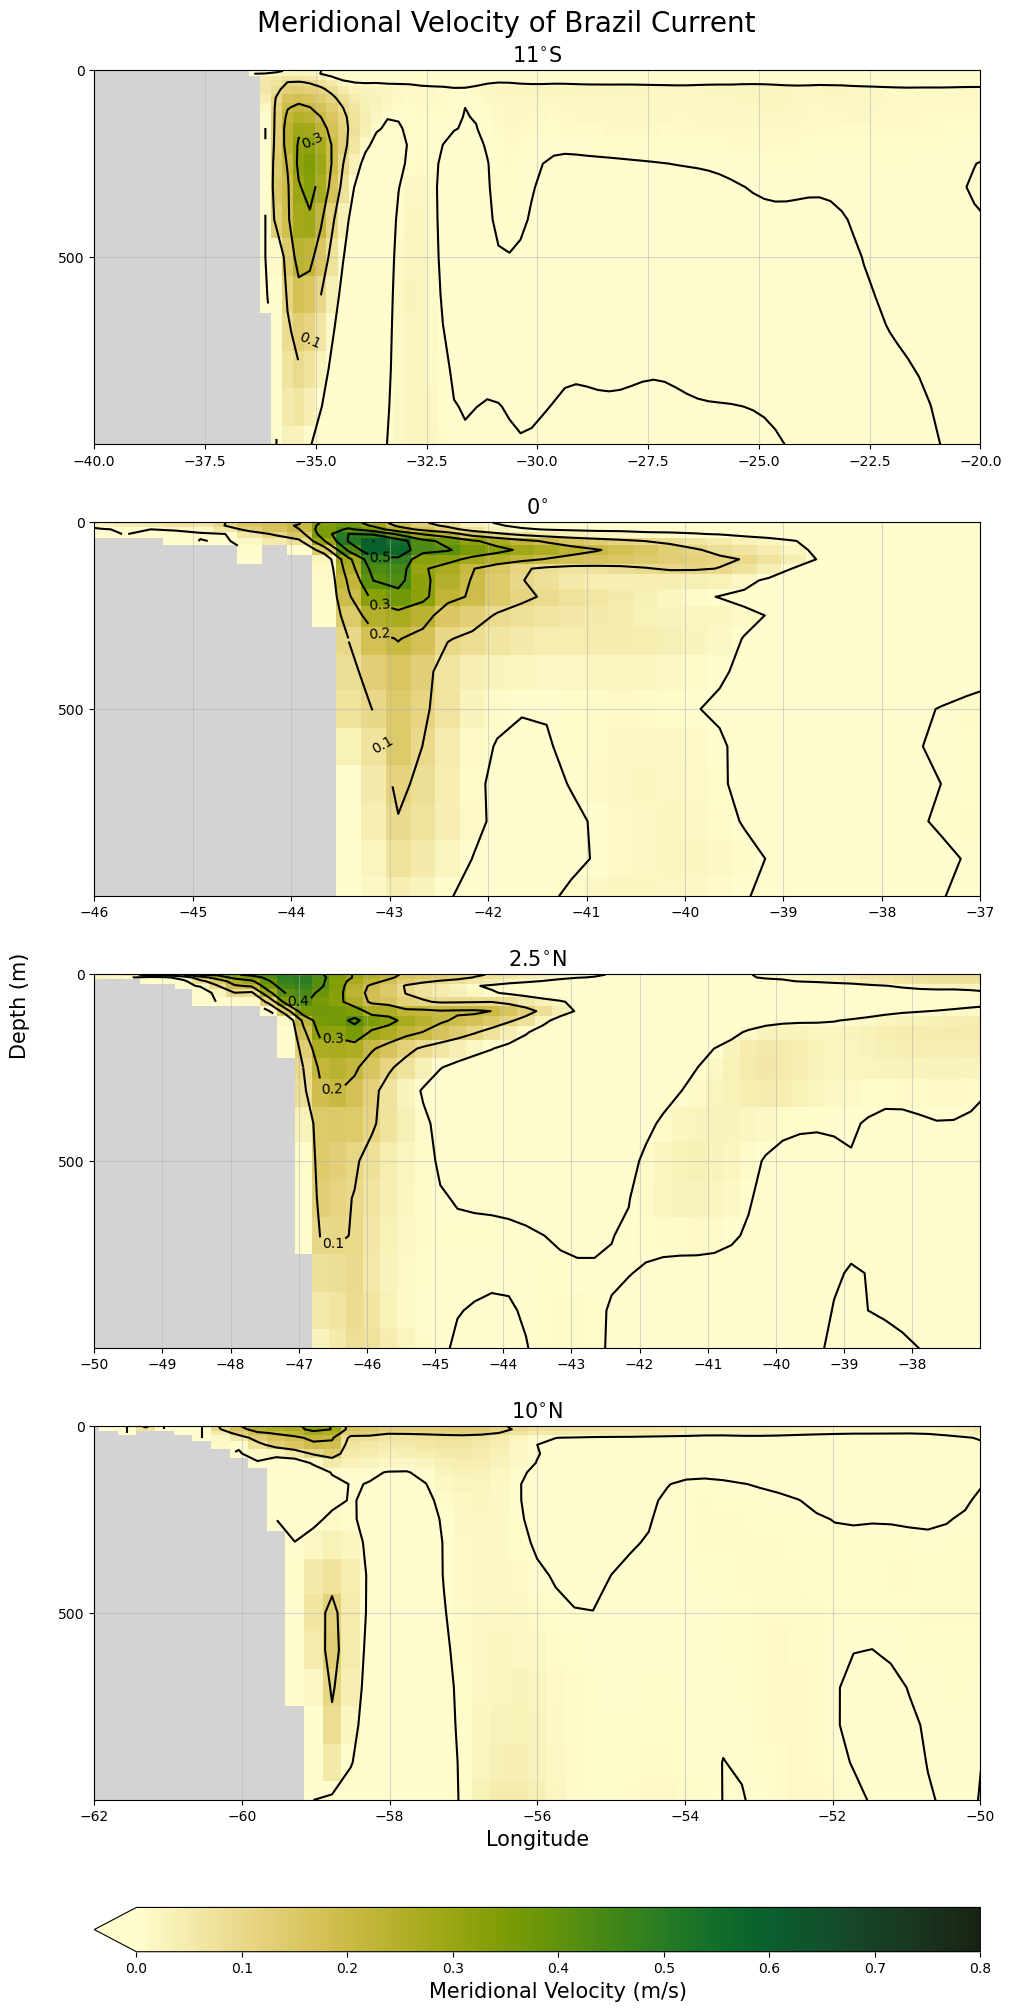

In [27]:
fig,ax=plt.subplots(nrows=4,ncols=1,constrained_layout=True,figsize=(10,20))

fig.suptitle('Meridional Velocity of Brazil Current',fontsize=20)
fig.supylabel('Depth (m)',fontsize=15)

# pcolormesh
v_5S=vo_mean.sel(yq=-11,method="nearest")
for_cbar=v_5S.plot(ax=ax[0],x='xh',y='z_l',cmap='cmo.speed',vmin=0,vmax=0.8,add_colorbar=False)
ax[0].set_xlim(-40,-20)
#ax[i].set_xticks(np.arange(-56,-30,2))

v_0=vo_mean.sel(yq=0,method="nearest")
v_0.plot(ax=ax[1],x='xh',y='z_l',cmap='cmo.speed',vmin=0,vmax=0.8,add_colorbar=False)
ax[1].set_xlim(-46,-37)

v_25=vo_mean.sel(yq=2.5,method="nearest")
v_25.plot(ax=ax[2],x='xh',y='z_l',cmap='cmo.speed',vmin=0,vmax=0.8,add_colorbar=False)
ax[2].set_xlim(-50,-37)

v_5N=vo_mean.sel(yq=10,method="nearest")
v_5N.plot(ax=ax[3],x='xh',y='z_l',cmap='cmo.speed',vmin=0,vmax=0.8,add_colorbar=False)
ax[3].set_xlim(-62,50)

# Contour
cplevels=np.arange(0,0.8,0.1)
label_levels=np.arange(0,0.8,0.2)

v_5S=vo_mean.sel(yq=-11,method="nearest")
v_5S_plot=v_5S.plot.contour(ax=ax[0],x='xh',y='z_l',levels=cplevels,colors='k',vmin=0,vmax=0.8)
ax[0].set_xlim(-40,-20)
#ax[0].set_xticks(np.arange(-36,-30,1))
manloc0=[(-35.1,250),(-35.1,750)]
ax[0].clabel(v_5S_plot,levels=cplevels,inline_spacing=0,manual=manloc0,colors='k')
ax[0].set_title('5$^{\circ}$S',fontsize=15)

v_0=vo_mean.sel(yq=0,method="nearest")
v_0_plot=v_0.plot.contour(ax=ax[1],x='xh',y='z_l',levels=cplevels,colors='k',vmin=0,vmax=0.8)
ax[1].set_xlim(-46,-37)
manloc1=[(-43.1,700),(-43.1,300),(-43.1,250),(-43.1,70)]
ax[1].clabel(v_0_plot,levels=cplevels,inline_spacing=-1,manual=manloc1,colors='k')
ax[1].set_title('0$^{\circ}$',fontsize=15)

v_25=vo_mean.sel(yq=2.5,method="nearest")
v_25_plot=v_25.plot.contour(ax=ax[2],x='xh',y='z_l',levels=cplevels,colors='k',vmin=0,vmax=0.8)
ax[2].set_xlim(-50,-37)
ax[2].set_xticks(np.arange(-50,-37,1))
manloc2=[(-47,20),(-46.5,700),(-46.5,250),(-46.5,100)]
ax[2].clabel(v_25_plot,levels=cplevels,inline_spacing=0,manual=manloc2,colors='k')
ax[2].set_title('2.5$^{\circ}$N',fontsize=15)

v_5N=vo_mean.sel(yq=10,method="nearest")
v_5N_plot=v_5N.plot.contour(ax=ax[3],x='xh',y='z_l',levels=cplevels,colors='k',vmin=0,vmax=0.8)
ax[3].set_xlim(-62,-50)
manloc3=[(-49,300),(-49.5,10),(-49,100)]
ax[3].clabel(v_5N_plot,levels=cplevels,inline=True,manual=manloc3,colors='k')
ax[3].set_title('5$^{\circ}$N',fontsize=15)

for i in range(0,4):
    lat=str(int((5*i)-5))
    ax[i].set_facecolor('lightgray')
    ax[i].set_ylim(0,1000)
    ax[i].set_xlabel(' ')
    ax[i].grid(alpha=0.5)
    ax[i].invert_yaxis()
    ax[i].set_ylabel(' ')
    ax[i].set_yticks(np.arange(0,1000,500))
    #ax[i].set_xticks(np.arange(-55,-30,5))
    
ax[0].set_title('11$^{\circ}$S', fontsize=15)
ax[3].set_title('10$^{\circ}$N', fontsize=15)
cbar=fig.colorbar(for_cbar, ax = ax[3], orientation = 'horizontal',extend='min',location='bottom',pad=0.15)
cbar.set_label('Meridional Velocity (m/s)',fontsize=15)
ax[3].set_xlabel('Longitude',fontsize=15)
